In [10]:
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [11]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
import seaborn as sns
import tqdm.autonotebook as tqdman

import utils

<IPython.core.display.Javascript object>

In [12]:
ID = "zn_fullset"

<IPython.core.display.Javascript object>

In [13]:
INPUT_FILE = Path(utils.DATA_DIR / "interim" / "delta_rf" / f"{ID}_delta-erf_meta.csv")

<IPython.core.display.Javascript object>

In [14]:
pdf = pd.read_csv(INPUT_FILE)

<IPython.core.display.Javascript object>

In [15]:
pdf.drop("run_id", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [16]:
pdf.dropna(inplace=True)

<IPython.core.display.Javascript object>

## Add median stats for each scenario

Median here is over all the MAGICC ensemble members

In [17]:
median_stats = (
    pdf.set_index(["ms", "ensemble_member"])[
        [
            "peak_warming",
            "SRM_years",
            "year_return_back_below_15_temp",
            "2100_warming",
            "average_cdr_between_peak_and_15_temp",
        ]
    ]
    .groupby("ms")
    .median()
)
# peak_warming_median.name = "peak_warming_median_for_ms"
median_stats = median_stats.rename(
    {
        "peak_warming": "peak_warming_median_for_ms",
        "SRM_years": "SRM_years_for_ms",
        "year_return_back_below_15_temp": "year_return_back_below_15_temp_for_ms",
        "2100_warming": "2100_warming_for_ms",
        "average_cdr_between_peak_and_15_temp": "average_cdr_between_peak_and_15_temp_for_ms",
    },
    axis="columns",
)
median_stats.head()

,peak_warming_median_for_ms,SRM_years_for_ms,year_return_back_below_15_temp_for_ms,2100_warming_for_ms,average_cdr_between_peak_and_15_temp_for_ms
ms,,,,,
AIM/CGE 2.1CD-LINKS_INDC2030i_1600,2.375120,264.0,2313.0,2.271328,13572.246674
AIM/CGE 2.1CD-LINKS_NDC2030i_1000,2.003129,218.0,2268.0,1.973153,18322.500511
AIM/CGE 2.2EN_INDCi2030_1000f,1.985222,134.5,2177.0,1.853102,5498.394800
AIM/CGE 2.2EN_INDCi2030_1200,2.001089,185.0,2225.0,1.965093,1572.887128
AIM/CGE 2.2EN_INDCi2030_1200f,2.047610,150.5,2191.0,1.952791,3379.019955


<IPython.core.display.Javascript object>

In [18]:
pdf_plus = pdf.set_index("ms").join(median_stats).reset_index()
pdf_plus.head()

,ms,2100_warming,SRM_years,TCRE,average_cdr_between_peak_and_15_temp,climate_model,ensemble_member,max_CDR,model,net_CDR_at_15_temp,...,scenario,total_CDR,unit,variable,year_return_back_below_15_temp,peak_warming_median_for_ms,SRM_years_for_ms,year_return_back_below_15_temp_for_ms,2100_warming_for_ms,average_cdr_between_peak_and_15_temp_for_ms
0,AIM/CGE 2.1CD-LINKS_INDC2030i_1600,2.489039,327,1.950013,13756.483088,MAGICCv7.5.3,0,-13683.159952,AIM/CGE 2.1,-3.410412e+06,...,CD-LINKS_INDC2030i_1600,-4.910419e+06,W/m^2,delta_rf,2382.0,2.37512,264.0,2313.0,2.271328,13572.246674
1,AIM/CGE 2.1CD-LINKS_INDC2030i_1600,4.067900,342,3.471558,13774.970781,MAGICCv7.5.3,1,-13683.159952,AIM/CGE 2.1,-3.851211e+06,...,CD-LINKS_INDC2030i_1600,-4.910419e+06,W/m^2,delta_rf,2414.0,2.37512,264.0,2313.0,2.271328,13572.246674
2,AIM/CGE 2.1CD-LINKS_INDC2030i_1600,2.719703,360,2.118768,13775.968509,MAGICCv7.5.3,2,-13683.159952,AIM/CGE 2.1,-4.085386e+06,...,CD-LINKS_INDC2030i_1600,-4.910419e+06,W/m^2,delta_rf,2431.0,2.37512,264.0,2313.0,2.271328,13572.246674
3,AIM/CGE 2.1CD-LINKS_INDC2030i_1600,1.986057,234,1.500595,13415.780984,MAGICCv7.5.3,3,-13683.159952,AIM/CGE 2.1,-2.074240e+06,...,CD-LINKS_INDC2030i_1600,-4.910419e+06,W/m^2,delta_rf,2285.0,2.37512,264.0,2313.0,2.271328,13572.246674
4,AIM/CGE 2.1CD-LINKS_INDC2030i_1600,2.595123,320,1.793987,13769.143526,MAGICCv7.5.3,4,-13683.159952,AIM/CGE 2.1,-3.286437e+06,...,CD-LINKS_INDC2030i_1600,-4.910419e+06,W/m^2,delta_rf,2373.0,2.37512,264.0,2313.0,2.271328,13572.246674


<IPython.core.display.Javascript object>

## Scenario uncertainty

First illustration of how sensitive SRM-years is to different scenario characteristics

(332, 2)

LinregressResult(slope=116.12913605322504, intercept=-62.219318395099094, rvalue=0.4022883032342261, pvalue=2.4020500706424902e-14, stderr=14.548270013586258, intercept_stderr=31.201839989698875)

(0.0, 500.0)

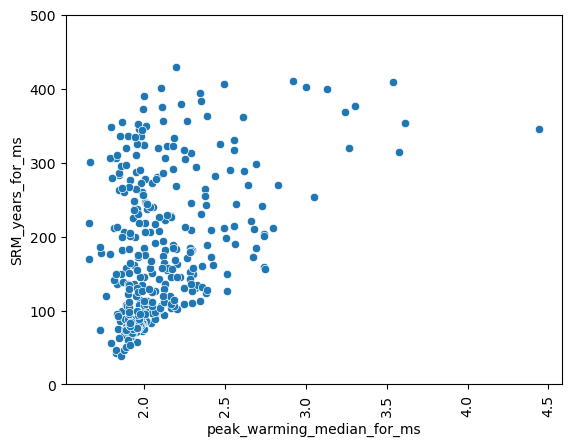

<IPython.core.display.Javascript object>

In [18]:
x = "peak_warming_median_for_ms"
y = "SRM_years_for_ms"

pdfh = pdf_plus[[x, y]].drop_duplicates()
display(pdfh.shape)
display(scipy.stats.linregress(pdfh[x], pdfh[y]))

ax = sns.scatterplot(data=pdfh, y=y, x=x)
# ax.legend(bbox_to_anchor=(1.05, 0.5), loc="center left")
plt.xticks(rotation=90)
ax.set_ylim([0, 500])

Plot above shows:

- Median SRM commitment is never zero (makes sense because scenarios all have peak warming > 1.5C)
- As median peak warming increases, median SRM commitment increases too, but relationship is pretty weak (r-squared is low)
- Massive variation in median SRM commitment just based on scenario

This plot motivates the questions:

- What controls the variation in median SRM commitment?
- How does uncertainty in SRM commitment look?

### Key variation in SRM years

(332, 3)

LinregressResult(slope=116.12913605322504, intercept=-62.219318395099094, rvalue=0.4022883032342261, pvalue=2.4020500706424902e-14, stderr=14.548270013586258, intercept_stderr=31.201839989698875)

(0.0, 500.0)

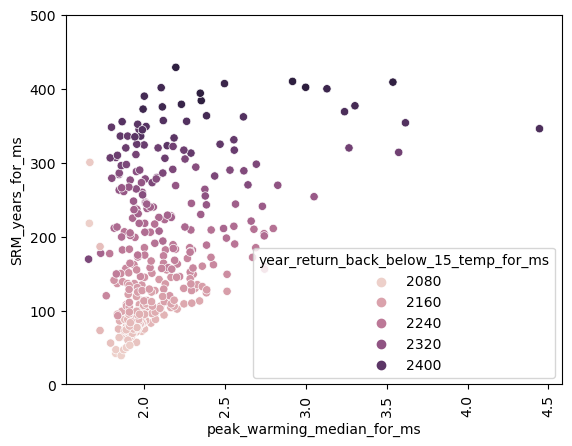

<IPython.core.display.Javascript object>

In [19]:
x = "peak_warming_median_for_ms"
y = "SRM_years_for_ms"
hue = "year_return_back_below_15_temp_for_ms"

pdfh = pdf_plus[[x, y, hue]].drop_duplicates()
display(pdfh.shape)
display(scipy.stats.linregress(pdfh[x], pdfh[y]))

ax = sns.scatterplot(data=pdfh, y=y, x=x, hue=hue)
# ax.legend(bbox_to_anchor=(1.05, 0.5), loc="center left")
plt.xticks(rotation=90)
ax.set_ylim([0, 500])

(332, 3)

LinregressResult(slope=0.9042495907904627, intercept=-1834.9991948216752, rvalue=0.9748159772322892, pvalue=3.989324534118783e-217, stderr=0.011387662309368154, intercept_stderr=25.4515111038433)

(0.0, 500.0)

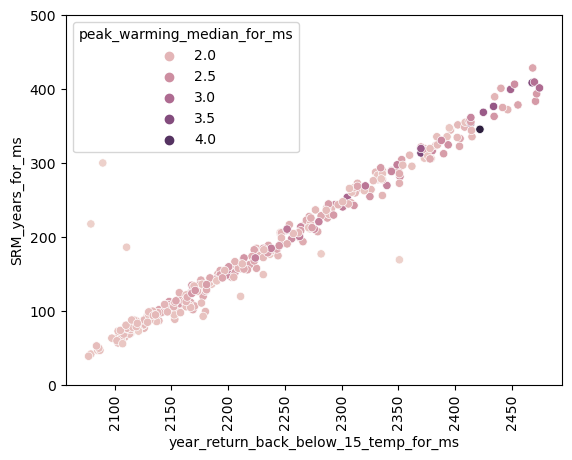

<IPython.core.display.Javascript object>

In [20]:
hue = "peak_warming_median_for_ms"
y = "SRM_years_for_ms"
x = "year_return_back_below_15_temp_for_ms"

pdfh = pdf_plus[[x, y, hue]].drop_duplicates()
display(pdfh.shape)
display(scipy.stats.linregress(pdfh[x], pdfh[y]))

ax = sns.scatterplot(data=pdfh, y=y, x=x, hue=hue)
# ax.legend(bbox_to_anchor=(1.05, 0.5), loc="center left")
plt.xticks(rotation=90)
ax.set_ylim([0, 500])

It's sort of obvious when you think about it/see it, but what really controls the number of SRM-years is how long you would overshoot 1.5C in your baseline scenario. In other words, how long it takes you to remove enough CO2/reduce non-CO2 greenhouse gas emissions enough to get back below 1.5C. The slower you are to do this, the longer you need SRM for.

Thoughts based on this plot:

- The more useful thing might be to make a plot where the x-axis is "average rate of CO2 removal between peak warming and returning back below 1.5C" (because its the average rate which controls the rate of cooling, not the peak rate or the total removals). That puts it back into emissions terms, which is the policy relevant thing, but using the peak warming hue allows us to still see how it's not just the average rate which is important, but also where you start from (i.e. the peak warming).
- I am not sure what is going on with the points at say (2100, 480). I would guess that these are related to non-CO2 or some funny edge effects, but that would be one to check.

We can also explore which scenario info has the best predictive power for SRM years using the below.

In [19]:
y = "SRM_years"
r2s = {}
for c in pdf_plus:
    if y in c:
        continue

    if not str(pdf_plus[c].dtype).startswith("float"):
        continue

    calc_tab = pdf_plus[[c, y, "ensemble_member", "ms"]].drop_duplicates().dropna()

    linreg_res = scipy.stats.linregress(calc_tab[c], calc_tab[y])
    r2 = linreg_res.rvalue**2
    pval = linreg_res.pvalue

    r2s[c] = r2
#     break
pd.Series(r2s).sort_values(ascending=False)

year_return_back_below_15_temp                 0.980814
year_return_back_below_15_temp_for_ms          0.485108
2100_warming                                   0.418673
net_CDR_at_15_temp                             0.369513
peak_warming                                   0.348157
net_emissions                                  0.179939
2100_warming_for_ms                            0.173452
TCRE                                           0.129817
peak_warming_median_for_ms                     0.129598
total_CDR                                      0.081818
average_cdr_between_peak_and_15_temp           0.070397
max_CDR                                        0.016400
average_cdr_between_peak_and_15_temp_for_ms    0.000059
dtype: float64

<IPython.core.display.Javascript object>

Interestingly, 2100 warming is the best predictor, ZN is surprised by this. Unsurprisingly, the overshoot in the baseline scenario has a big impact, then peak warming, then total CDR and TCRE. I'm also surprised that average CDR isn't a great predictor, I guess it gets washed out/blended in with climate uncertainty.

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

<IPython.core.display.Javascript object>

In [46]:
# select features and remove rows with NaN
pdf_plus_na = pdf_plus[
    [
        "SRM_years",
        #    "year_return_back_below_15_temp",
        "average_cdr_between_peak_and_15_temp",
        "TCRE",
        "net_emissions",
        #    "total_emissions",
    ]
].dropna()

# group SRM into categories
pdf_plus_na["SRM_years"] = pd.cut(
    pdf_plus_na["SRM_years"],
    [0, 100, 200, 300, 400, 500],
    labels=["100", "200", "300", "400", "500"],
).reset_index(drop=True)


Y = pdf_plus_na["SRM_years"]
X = pdf_plus_na[
    [
        "average_cdr_between_peak_and_15_temp",
        "TCRE",
        "net_emissions",
        #     "total_emissions",
    ]
]

<IPython.core.display.Javascript object>

In [47]:
# scale features
x_scaled = StandardScaler().fit_transform(X)

<IPython.core.display.Javascript object>

In [48]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(x_scaled)


pca_df = pd.DataFrame(data=pca_features, columns=["PC1", "PC2"])
# concat with SRM years
final_pca_df = pd.concat([pca_df, pdf_plus_na["SRM_years"]], axis=1)

print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))
# print(pca.explained_variance_)

[0.44698165 0.35794128]
0.8049229272196645


<IPython.core.display.Javascript object>

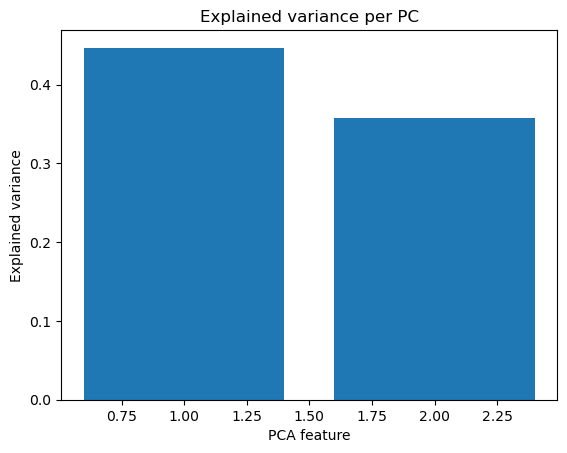

<IPython.core.display.Javascript object>

In [49]:
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)

plt.xlabel("PCA feature")
plt.ylabel("Explained variance")
plt.title("Explained variance per PC")
plt.show()

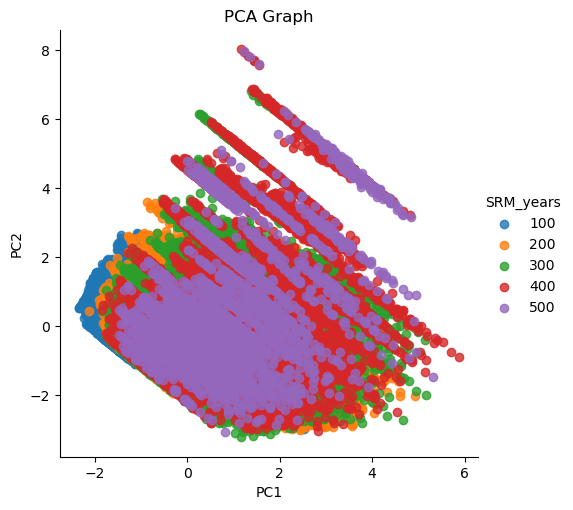

<IPython.core.display.Javascript object>

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# sns.set()

sns.lmplot(
    x="PC1",
    y="PC2",
    data=final_pca_df,
    hue="SRM_years",
    fit_reg=False,
    legend=True,
)

plt.title("PCA Graph")
plt.show()

In [51]:
# PC correlation coef
correlation_coef = pca.components_

# Number of features before PCA
n_features = pca.n_features_
feature_names = list(X.columns)

# PC names
pc_list = [f"PC{i}" for i in list(range(1, n_features + 1))]

# Match PC names to correlation coefficent
pc_corcoef = dict(zip(pc_list, correlation_coef))

# Matrix of corr coefs between feature names and PCs
corcoef_df = pd.DataFrame.from_dict(pc_corcoef)
corcoef_df["feature_names"] = feature_names
corcoef_df = corcoef_df.set_index("feature_names")
corcoef_df

/Users/baur/opt/anaconda3/envs/baur-et-al-srm-commitment/lib/python3.9/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


,PC1,PC2
feature_names,,
average_cdr_between_peak_and_15_temp,0.739702,0.051042
TCRE,0.554758,-0.610650
net_emissions,0.380899,0.790254


<IPython.core.display.Javascript object>

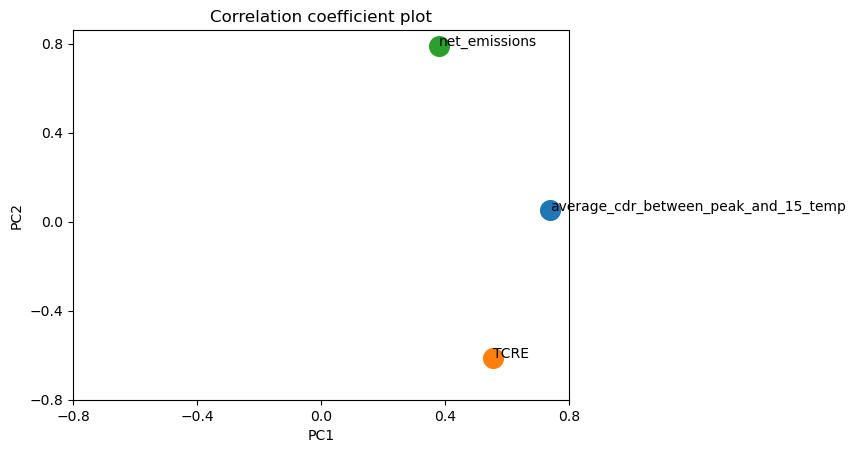

<IPython.core.display.Javascript object>

In [53]:
import matplotlib.pyplot as plt
import numpy as np

xs = correlation_coef[0]
ys = correlation_coef[1]

for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=200)
    plt.text(xs[i], ys[i], varnames)


# Define the axes
xticks = np.linspace(-0.8, 0.8, num=5)
yticks = np.linspace(-0.8, 0.8, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel("PC1")
plt.ylabel("PC2")

# Show plot
plt.title("Correlation coefficient plot")
plt.show()

(332, 3)

LinregressResult(slope=133.65367962699574, intercept=-80.22267426937384, rvalue=0.469010067077293, pvalue=1.4620932096718724e-19, stderr=13.854706014313624, intercept_stderr=27.766720675143286)

(0.0, 500.0)

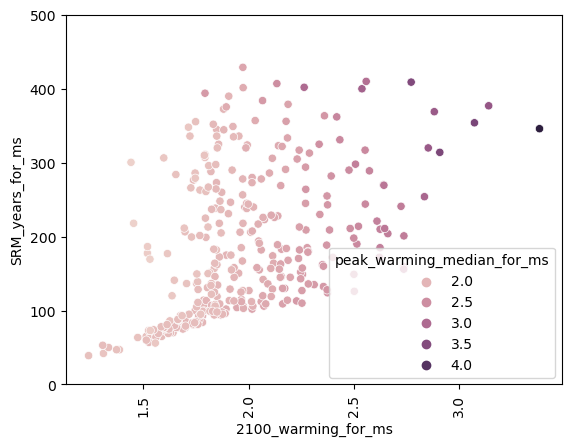

<IPython.core.display.Javascript object>

In [30]:
hue = "peak_warming_median_for_ms"
y = "SRM_years_for_ms"
x = "2100_warming_for_ms"

pdfh = pdf_plus[[x, y, hue]].drop_duplicates()
display(pdfh.shape)
display(scipy.stats.linregress(pdfh[x], pdfh[y]))

ax = sns.scatterplot(data=pdfh, y=y, x=x, hue=hue)
# ax.legend(bbox_to_anchor=(1.05, 0.5), loc="center left")
plt.xticks(rotation=90)
ax.set_ylim([0, 500])

(331, 3)

LinregressResult(slope=-0.0035041538204022087, intercept=212.41045464245053, rvalue=-0.20267967609306534, pvalue=0.00020556057960340076, stderr=0.000933397029997963, intercept_stderr=9.29489686293445)

(0.0, 500.0)

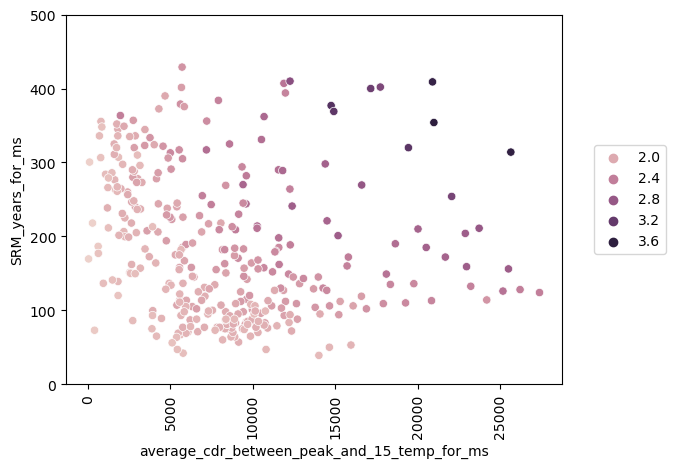

<IPython.core.display.Javascript object>

In [32]:
hue = "peak_warming_median_for_ms"
y = "SRM_years_for_ms"
x = "average_cdr_between_peak_and_15_temp_for_ms"

pdfh = pdf_plus[[x, y, hue]].drop_duplicates()
pdfh = pdfh[pdfh["peak_warming_median_for_ms"] <= 4]
display(pdfh.shape)
display(scipy.stats.linregress(pdfh[x], pdfh[y]))

ax = sns.scatterplot(data=pdfh, y=y, x=x, hue=hue)
ax.legend(bbox_to_anchor=(1.05, 0.5), loc="center left")
plt.xticks(rotation=90)
ax.set_ylim([0, 500])

Average CDR alone isn't a great predictor but it tells a pretty good story when combined with the peak warming. 

Thoughts:

- Doing a principal analysis could be good to identify the directions which most control variance in SRM-years (maybe peak warming is dominant, then its all about average CDR for the rest of the variance...)

## 2.8°C peak warming plot

In [148]:
peaks = [1.8, 2.4, 2.8, 4]
appended_data = []

for peak in peaks:
    sel = pdf_plus[
        (pdf_plus["peak_warming"] < peak + 0.05)
        & (pdf_plus["peak_warming"] > peak - 0.05)
    ]
    appended_data.append(sel)
sel_scenarios = pd.concat(appended_data)

<IPython.core.display.Javascript object>

In [163]:
box_data = sel_scenarios[
    ["SRM_years", "average_cdr_between_peak_and_15_temp", "peak_warming"]
].drop_duplicates()

<IPython.core.display.Javascript object>

In [172]:
## categories
box_data["Average CDR"] = pd.cut(
    box_data["average_cdr_between_peak_and_15_temp"],
    [0, 10000, 20000, 30000, 40000],
    labels=["10", "20", "30", "40"],
)
box_data["Peak Warming"] = pd.cut(
    box_data["peak_warming"],
    [0, 1.9, 2.5, 2.9, 4.1],
    labels=["1.8 °C", "2.4 °C", "2.8 °C", "4.0 °C"]
)


<IPython.core.display.Javascript object>

(0.0, 500.0)

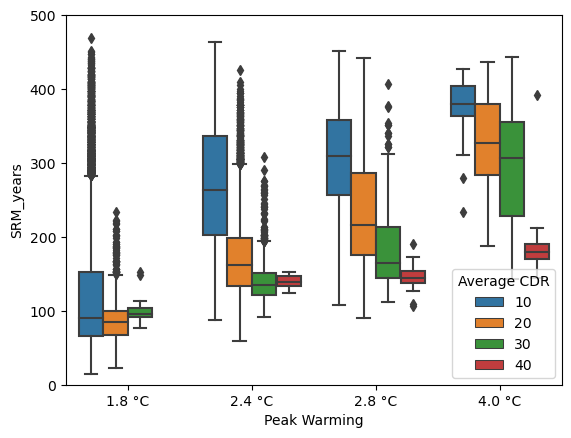

<IPython.core.display.Javascript object>

In [173]:
sns.boxplot(data=box_data, x="Peak Warming", y="SRM_years", hue="Average CDR")
# plt.title(f"Peak-warming {peak}°C ±0.05 N=" + str(len(box_data)))
plt.ylim(0, 500)

## Climate uncertainty

Pick scenarios that have median peak warming at 1.5, 2.0 and 2.5 (say) and show how climate uncertainty leads to large SRM-year uncertainty.

In [14]:
peaks_of_interest = [1.5, 1.98, 2.0, 2.5, 3.0]
# peaks_of_interest = [2.0]
picked_scenarios = []
for t in tqdman.tqdm(peaks_of_interest):
    picked_idx = (pdf_plus["peak_warming_median_for_ms"] - t).abs().idxmin()
    picked_scenario = pdf_plus.loc[picked_idx, "ms"]
    picked_scenarios.append(picked_scenario)

picked_scenarios

  0%|          | 0/5 [00:00<?, ?it/s]

['POLES ADVANCEADVANCE_2030_Price1.5C',
 'COFFEE 1.1EN_INDCi2030_500f',
 'IMAGE 3.0EN_INDCi2030_1200',
 'MESSAGEix-GLOBIOM_1.1EN_INDCi2030_2500_COV',
 'IMAGE 3.0EN_INDCi2030_3000f']

<IPython.core.display.Javascript object>

In [15]:
pdf_clim_unc = pdf_plus[pdf_plus["ms"].isin(picked_scenarios)]

<IPython.core.display.Javascript object>

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1.7846282829295572'),
  Text(1, 0, '1.981057724733526'),
  Text(2, 0, '2.0008991408173724'),
  Text(3, 0, '2.501400754522165'),
  Text(4, 0, '3.0228807159925637')])

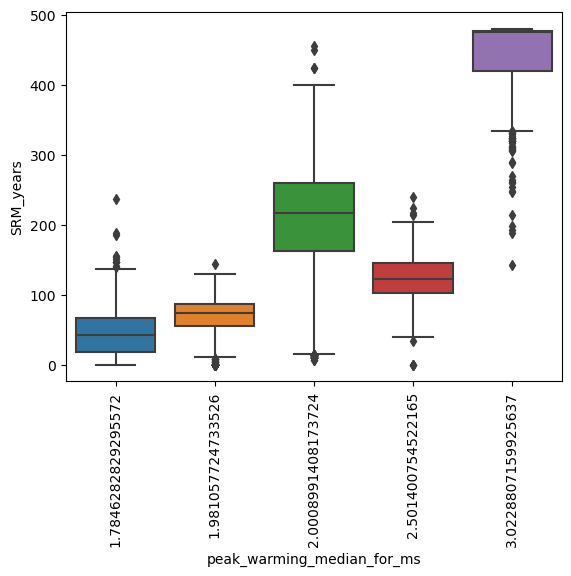

<IPython.core.display.Javascript object>

In [16]:
x = "ms"
x = "peak_warming_median_for_ms"
y = "SRM_years"

pdf_clim_unc_sns = pdf_clim_unc[[x, y, "ensemble_member"]].drop_duplicates()

ax = sns.boxplot(data=pdf_clim_unc_sns, y=y, x=x)
# ax.legend(bbox_to_anchor=(1.05, 0.5), loc="center left")
plt.xticks(rotation=90)

Plot above allows us to make these points:

- Even if your baseline scenario would peak at 1.8C (median), your SRM commitment could be anywhere from zero (best-case) to hundreds of years, with a median commitment of around 50 years. 
- The scenario characteristics (see plots above) have strong impact on both median estimate of SRM years as well as the uncertainty (compare scenarios that have peak warming at 1.98C and 2.0C yet completely different SRM year distributions)

Thought from above plot:

- I wonder what characteristics of scenarios make uncertainty larger or smaller (I'm not sure how to quantify 'larger uncertainty' or show this in a plot so might be best left as an extension idea for now). For example, is it the maximum CDR, the average rate of removal of CDR, non-CO2 stuff, some combination of all of the above?

Pick scenarios with peak warming around some value, then make similar plot as above. That allows us to show how SRM could look under different potential futures (e.g. world which has peak warming around 2.8C in absence of SRM, world which has peak warming around 2.4C in absence of SRM).

In [17]:
peak_val = 2.8
atol = 0.05

# peak_val = 2.4
# atol = 0.05

tmp = pdf_plus.set_index("ms")["peak_warming_median_for_ms"]
picked_scenarios = (
    tmp[(tmp - peak_val).abs() < atol].drop_duplicates().index.values.tolist()
)
picked_scenarios

['COFFEE 1.1EN_INDCi2030_2500',
 'COFFEE 1.1EN_INDCi2030_2500f',
 'MESSAGEix-GLOBIOM_1.1NGFS2_Nationally Determined Contributions (NDCs)']

<IPython.core.display.Javascript object>

(array([0, 1, 2]),
 [Text(0, 0, 'COFFEE 1.1EN_INDCi2030_2500'),
  Text(1, 0, 'COFFEE 1.1EN_INDCi2030_2500f'),
  Text(2, 0, 'MESSAGEix-GLOBIOM_1.1NGFS2_Nationally Determined Contributions (NDCs)')])

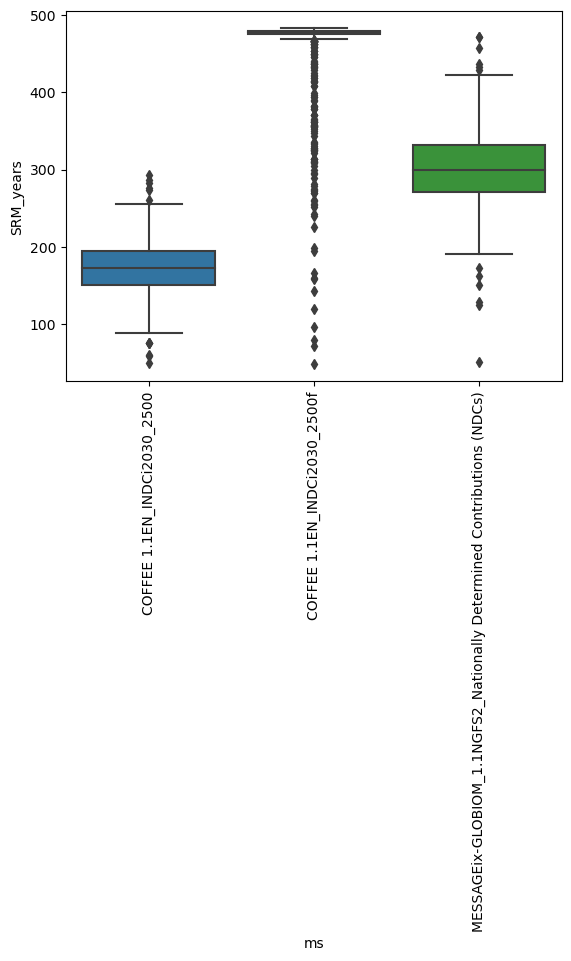

<IPython.core.display.Javascript object>

In [18]:
pdf_clim_unc_2 = pdf_plus[pdf_plus["ms"].isin(picked_scenarios)]

x = "ms"
# x = "peak_warming_median_for_ms"
y = "SRM_years"

pdf_clim_unc_sns = pdf_clim_unc_2[[x, y, "ensemble_member"]].drop_duplicates()

ax = sns.boxplot(data=pdf_clim_unc_sns, y=y, x=x)
# ax.legend(bbox_to_anchor=(1.05, 0.5), loc="center left")
plt.xticks(rotation=90)

## Scratch

Bits and pieces that Zeb hasn't really thought through

(0.0, 25.0)

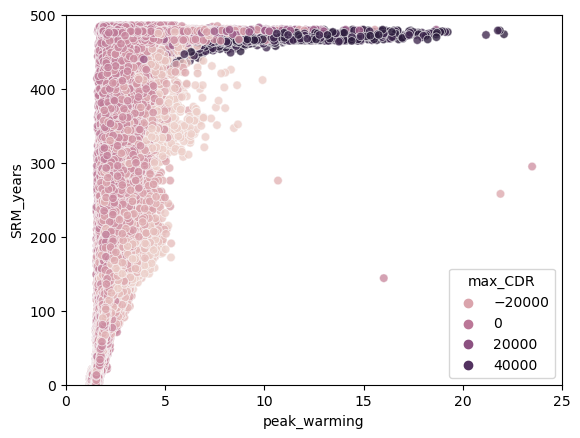

<IPython.core.display.Javascript object>

In [19]:
ax = sns.scatterplot(
    data=pdf,
    x="peak_warming",
    y="SRM_years",
    hue="max_CDR",
    alpha=0.4,
)
ax.set_ylim([0, 500])
ax.set_xlim([0, 25])

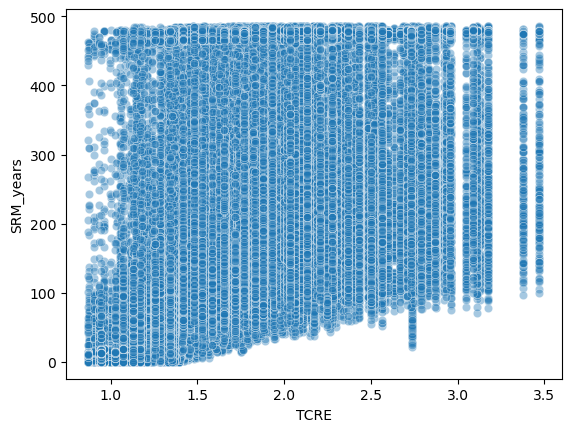

<IPython.core.display.Javascript object>

In [20]:
ax = sns.scatterplot(
    data=pdf,
    x="TCRE",
    y="SRM_years",
    #     hue="peak_warming",
    alpha=0.4,
)
# ax.set_ylim([0, 500])
# ax.set_xlim([0, 25])

- higher overshoot in base implies more SRM (obvious)
- longer overshoot in base implies longer SRM (obvious)
- faster CDR implies shorter SRM (obvious)
    - need average CDR over overshoot period
    - SRM less than 10 years only possible if average CDR > X or your overshoot < Y
- climate uncertainty for given set of scenarios
- scenario uncertainty for given climate

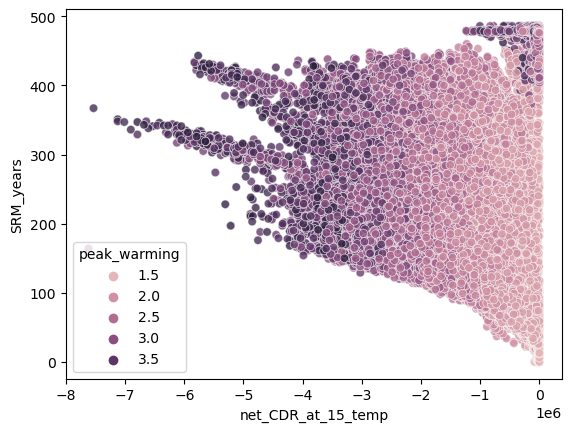

<IPython.core.display.Javascript object>

In [21]:
ax = sns.scatterplot(
    data=pdf[pdf["peak_warming"] < 4],
    x="net_CDR_at_15_temp",
    y="SRM_years",
    hue="peak_warming",
    alpha=0.4,
)
# ax.set_ylim([0, 500])
# ax.set_xlim([0, 25])

In [22]:
pdf.columns.tolist()

['2100_warming',
 'SRM_years',
 'TCRE',
 'average_cdr_between_peak_and_15_temp',
 'climate_model',
 'ensemble_member',
 'max_CDR',
 'model',
 'ms',
 'net_CDR_at_15_temp',
 'peak_warming',
 'region',
 'run_id',
 'scenario',
 'total_CDR',
 'total_emissions',
 'unit',
 'variable',
 'year_return_back_below_15_temp']

<IPython.core.display.Javascript object>

In [23]:
pdf_median_climate = pdf[
    [
        "SRM_years",
        "TCRE",
        #  'climate_model',
        #         "ensemble_member",
        "max_CDR",
        #  'model',
        "ms",
        #  'net_CDR_at_15_temp',
        "peak_warming",
        #  'region',
        #  'run_id',
        #  'scenario',
        #  'total_CDR',
        #  'total_emissions',
        #  'unit',
        #  'variable',
        #  'year_return_back_below_15_temp'
    ]
]
group_cols = ["ms", "max_CDR"]
pdf_median_climate = pdf_median_climate.groupby(group_cols).median()
pdf_median_climate

,,SRM_years,TCRE,peak_warming
ms,max_CDR,,,
AIM/CGE 2.1CD-LINKS_INDC2030i_1600,-10687.316805,285.5,1.733691,2.356059
AIM/CGE 2.1CD-LINKS_NDC2030i_1000,-28033.083458,181.0,1.733691,1.997665
AIM/CGE 2.2EN_INDCi2030_1000f,-35200.382298,133.0,1.733691,1.965267
AIM/CGE 2.2EN_INDCi2030_1200,-5535.291851,239.5,1.733691,1.982392
AIM/CGE 2.2EN_INDCi2030_1200f,-6018.005593,186.0,1.733691,2.029059
...,...,...,...,...
POLES ENGAGEEN_INDCi2030_2000,-21576.838753,157.5,1.733691,2.413168
POLES ENGAGEEN_INDCi2030_2000f,-35563.281252,145.0,1.733691,2.413184
POLES ENGAGEEN_INDCi2030_800f,-7083.314848,126.0,1.733691,1.978114


<IPython.core.display.Javascript object>

(0.0, 4.0)

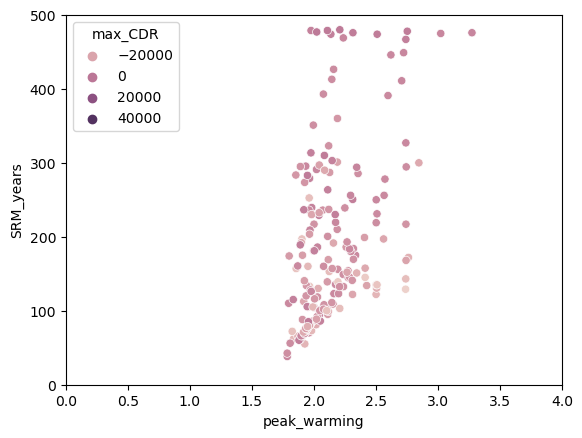

<IPython.core.display.Javascript object>

In [24]:
ax = sns.scatterplot(
    data=pdf_median_climate,
    x="peak_warming",
    y="SRM_years",
    hue="max_CDR",
    #     alpha=0.4,
)
ax.set_ylim([0, 500])
ax.set_xlim([0, 4])

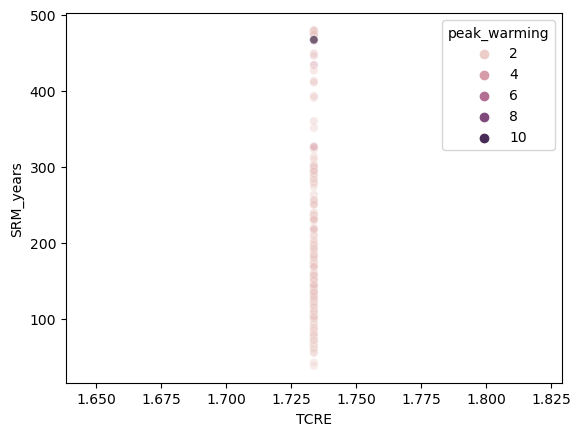

<IPython.core.display.Javascript object>

In [25]:
ax = sns.scatterplot(
    data=pdf_median_climate,
    x="TCRE",
    y="SRM_years",
    hue="peak_warming",
    alpha=0.4,
)
# ax.set_ylim([0, 500])
# ax.set_xlim([0, 25])